In [1]:
!pip install wordcloud
!pip install snscrape
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import snscrape.modules.twitter as sntwitter
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
#Get user input
query = input("Query: ")

#As long as the query is valid (not empty or equal to '#')...
if query != '':
    noOfTweet = input("Enter the number of tweets you want to Analyze: ")
    if noOfTweet != '' :
        noOfDays = input("Enter the number of days you want to Scrape Twitter for: ")
        if noOfDays != '':
                #Creating list to append tweet data
                tweets_list = []
                now = dt.date.today()
                now = now.strftime('%Y-%m-%d')
                yesterday = dt.date.today() - dt.timedelta(days = int(noOfDays))
                yesterday = yesterday.strftime('%Y-%m-%d')
                for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query + ' lang:en since:' +  yesterday + ' until:' + now + ' -filter:links -filter:replies').get_items()):
                    if i > int(noOfTweet):
                        break
                    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

                #Creating a dataframe from the tweets list above 
                df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

                print(df)

Query: #Nifty
Enter the number of tweets you want to Analyze: 100
Enter the number of days you want to Scrape Twitter for: 2
                     Datetime             Tweet Id  \
0   2022-11-03 20:48:43+00:00  1588271979047849985   
1   2022-11-03 20:28:51+00:00  1588266981593010176   
2   2022-11-03 19:43:14+00:00  1588255502604980225   
3   2022-11-03 19:39:10+00:00  1588254478482149376   
4   2022-11-03 19:30:00+00:00  1588252171392483328   
..                        ...                  ...   
96  2022-11-03 13:00:33+00:00  1588154162352570370   
97  2022-11-03 12:49:52+00:00  1588151473577172992   
98  2022-11-03 12:48:28+00:00  1588151123164073984   
99  2022-11-03 12:47:24+00:00  1588150852883128321   
100 2022-11-03 12:46:57+00:00  1588150739666436098   

                                                  Text         Username  
0    Stock market is not your mother. It consist of...       loganath87  
1    #Nifty doesn’t seem to be chrashing to me, the...   vipermanTrades  
2   

In [4]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

#applying this function to Text column of our dataframe
df["Text"] = df["Text"].apply(cleanTxt)

In [5]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
tweet_list1 = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for tweet in df['Text']:
    tweet_list1.append(tweet)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(tweet) #appending the tweet that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(tweet) #appending the tweet that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(tweet) #appending the tweet that satisfies this condition
        neutral += 1 #increasing the count by 1 

positive = percentage(positive, len(df)) #percentage is the function defined above
negative = percentage(negative, len(df))
neutral = percentage(neutral, len(df))

In [6]:
tweet_list1 = pd.DataFrame(tweet_list1)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Since " + noOfDays + " days, there have been", len(tweet_list1) ,  "tweets on " + query, end='\n*')
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n*')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n*')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n*')

Since 2 days, there have been 101 tweets on #Nifty
*Positive Sentiment: 95.00
*Neutral Sentiment: 2.00
*Negative Sentiment: 4.00
*

Wordcloud for #Nifty


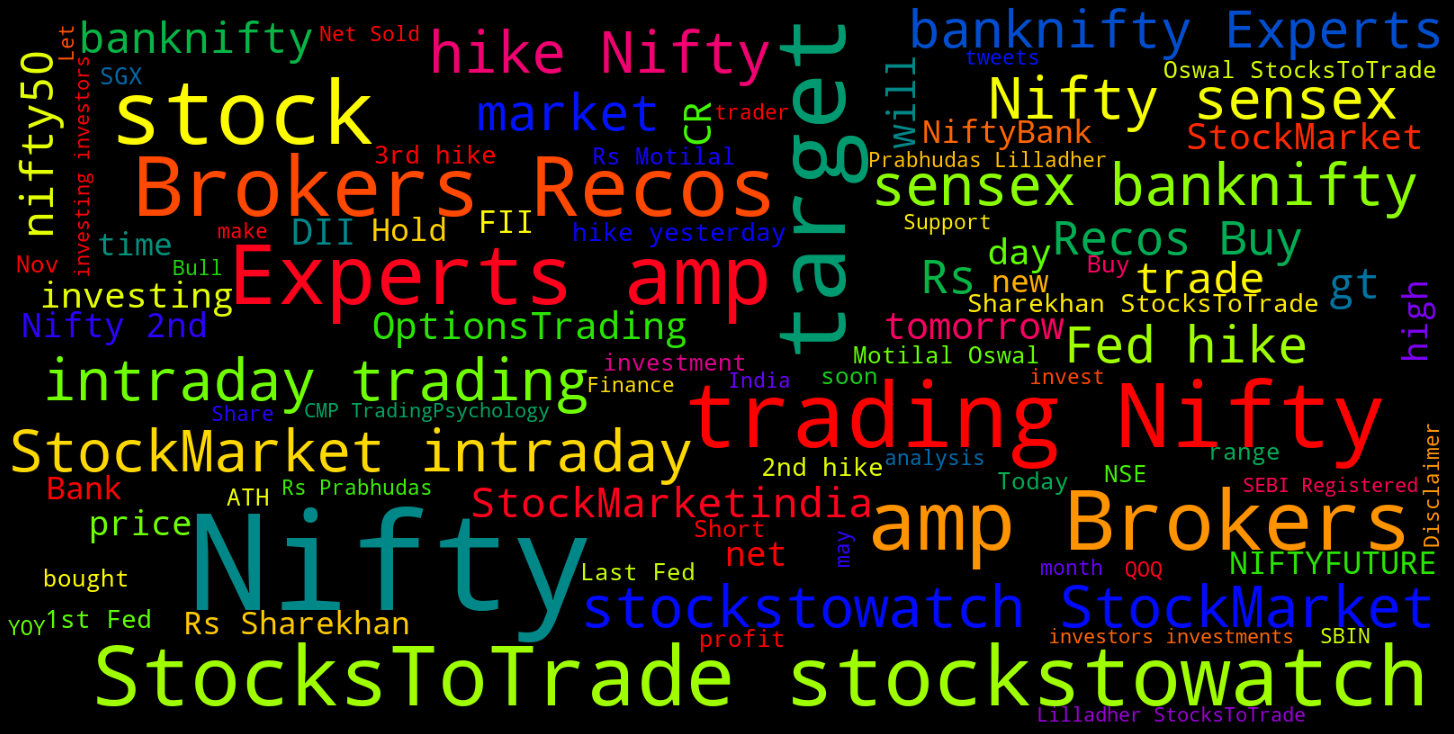

In [7]:
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([twts for twts in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + query)
word_cloud(df['Text'].values)